# 게임개발
- source : [백준 1516](https://www.acmicpc.net/problem/1516)
- 난이도 : 골드 II
- 분류 : 다이나믹 프로그래밍, 그래프 이론, 위상 정렬

## 문제
- 숌 회사에서 이번에 새로운 전략 시뮬레이션 게임 세준 크래프트를 개발하기로 하였다. 핵심적인 부분은 개발이 끝난 상태고, 종족별 균형과 전체 게임 시간 등을 조절하는 부분만 남아 있었다.

- 게임 플레이에 들어가는 시간은 상황에 따라 다를 수 있기 때문에, 모든 건물을 짓는데 걸리는 최소의 시간을 이용하여 근사하기로 하였다. 물론, 어떤 건물을 짓기 위해서 다른 건물을 먼저 지어야 할 수도 있기 때문에 문제가 단순하지만은 않을 수도 있다. 예를 들면 스타크래프트에서 벙커를 짓기 위해서는 배럭을 먼저 지어야 하기 때문에, 배럭을 먼저 지은 뒤 벙커를 지어야 한다. 여러 개의 건물을 동시에 지을 수 있다.

- 편의상 자원은 무한히 많이 가지고 있고, 건물을 짓는 명령을 내리기까지는 시간이 걸리지 않는다고 가정하자.
    
## 입력
- 첫째 줄에 건물의 종류 수 N(1 ≤ N ≤ 500)이 주어진다. 다음 N개의 줄에는 각 건물을 짓는데 걸리는 시간과 그 건물을 짓기 위해 먼저 지어져야 하는 건물들의 번호가 주어진다. 건물의 번호는 1부터 N까지로 하고, 각 줄은 -1로 끝난다고 하자. 각 건물을 짓는데 걸리는 시간은 100,000보다 작거나 같은 자연수이다. 모든 건물을 짓는 것이 가능한 입력만 주어진다.

## 출력
- N개의 각 건물이 완성되기까지 걸리는 최소 시간을 출력한다.

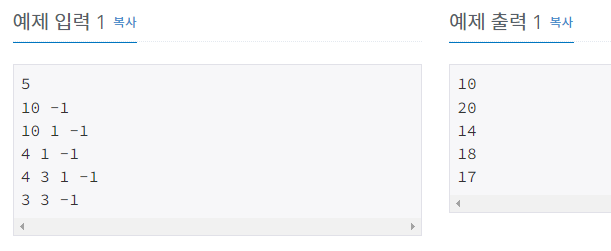

**최종코드**

In [23]:
import sys
inp = sys.stdin.readline

from collections import deque

N = int(inp())

building = [[] for _ in range(N+1)]
indegree = [0] * (N+1)
cost = [0] * (N+1)


for i in range(1, N+1):
    data = list(map(int, inp().split()))[:-1] # 마지막 -1 는 제거
    cost[i] = data[0]
    building_data = data[1:] 
    
    for j in building_data:
        building[j].append(i)
        indegree[i] += 1

def topology_sort():
    result = [0] * (N+1)
    q = deque()
    
    for i in range(1, N+1):
        if indegree[i] == 0:
            q.append(i)
    
    while q:
        now = q.popleft()
        
        result[now] += cost[now]
        for b in building[now]:
            indegree[b] -= 1
            
            result[b] = max(result[b], result[now])
            if indegree[b] == 0:
                q.append(b)
    
    return result

answer = topology_sort()
for i in range(1, N+1):
    print(answer[i])

ValueError: invalid literal for int() with base 10: ''

- topology sort 에 대한 공부를 더 해야겠다. 

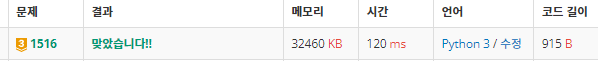

- [코드 출처](https://velog.io/@kimdukbae/BOJ-1516-%EA%B2%8C%EC%9E%84-%EA%B0%9C%EB%B0%9C-Python)